In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, shapiro, wilcoxon

In [2]:
data = pd.read_parquet('yellow_tripdata_2021-01.parquet')
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2,8.00,3.00,0.5,0.00,0.00,0.3,11.80,2.5,NaN
1,1,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2,3.00,0.50,0.5,0.00,0.00,0.3,4.30,0.0,NaN
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1,42.00,0.50,0.5,8.65,0.00,0.3,51.95,0.0,NaN
3,1,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1,29.00,0.50,0.5,6.05,0.00,0.3,36.35,0.0,NaN
4,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1,16.50,0.50,0.5,4.06,0.00,0.3,24.36,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369764,2,2021-01-31 23:03:00,2021-01-31 23:33:00,NaN,8.89,NaN,None,229,181,0,27.78,0.00,0.5,7.46,0.00,0.3,38.54,NaN,NaN
1369765,2,2021-01-31 23:29:00,2021-01-31 23:51:00,NaN,7.43,NaN,None,41,70,0,32.58,0.00,0.5,0.00,6.12,0.3,39.50,NaN,NaN
1369766,2,2021-01-31 23:25:00,2021-01-31 23:38:00,NaN,6.26,NaN,None,74,137,0,16.85,0.00,0.5,3.90,0.00,0.3,24.05,NaN,NaN
1369767,6,2021-01-31 23:01:06,2021-02-01 00:02:03,NaN,19.70,NaN,None,265,188,0,53.68,0.00,0.5,0.00,0.00,0.3,54.48,NaN,NaN


In [3]:
data = data[data.tpep_pickup_datetime.dt.year != 2009]
data = data[data.tpep_pickup_datetime.dt.month < 2]

In [4]:
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2,8.00,3.00,0.5,0.00,0.00,0.3,11.80,2.5,NaN
1,1,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2,3.00,0.50,0.5,0.00,0.00,0.3,4.30,0.0,NaN
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1,42.00,0.50,0.5,8.65,0.00,0.3,51.95,0.0,NaN
3,1,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1,29.00,0.50,0.5,6.05,0.00,0.3,36.35,0.0,NaN
4,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1,16.50,0.50,0.5,4.06,0.00,0.3,24.36,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369764,2,2021-01-31 23:03:00,2021-01-31 23:33:00,NaN,8.89,NaN,None,229,181,0,27.78,0.00,0.5,7.46,0.00,0.3,38.54,NaN,NaN
1369765,2,2021-01-31 23:29:00,2021-01-31 23:51:00,NaN,7.43,NaN,None,41,70,0,32.58,0.00,0.5,0.00,6.12,0.3,39.50,NaN,NaN
1369766,2,2021-01-31 23:25:00,2021-01-31 23:38:00,NaN,6.26,NaN,None,74,137,0,16.85,0.00,0.5,3.90,0.00,0.3,24.05,NaN,NaN
1369767,6,2021-01-31 23:01:06,2021-02-01 00:02:03,NaN,19.70,NaN,None,265,188,0,53.68,0.00,0.5,0.00,0.00,0.3,54.48,NaN,NaN


In [5]:
data.tpep_pickup_datetime.dt.month.value_counts()

1    1369745
Name: tpep_pickup_datetime, dtype: int64

In [6]:
data[data['tpep_pickup_datetime'].dt.day < 8].isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count           20911
trip_distance                 0
RatecodeID                20911
store_and_fwd_flag        20911
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge      20911
airport_fee              276739
dtype: int64

In [7]:
data[data['tpep_pickup_datetime'].dt.day == 1]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2,8.00,3.0,0.5,0.00,0.0,0.3,11.80,2.5,NaN
1,1,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2,3.00,0.5,0.5,0.00,0.0,0.3,4.30,0.0,NaN
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1,42.00,0.5,0.5,8.65,0.0,0.3,51.95,0.0,NaN
3,1,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1,29.00,0.5,0.5,6.05,0.0,0.3,36.35,0.0,NaN
4,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1,16.50,0.5,0.5,4.06,0.0,0.3,24.36,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273272,2,2021-01-01 23:33:00,2021-01-01 23:38:00,NaN,2.11,NaN,None,140,263,0,8.30,0.0,0.5,2.39,0.0,0.3,13.99,NaN,NaN
1273273,1,2021-01-01 23:15:32,2021-01-01 23:33:04,NaN,11.50,NaN,None,138,231,0,32.00,0.5,0.5,7.16,0.0,0.3,42.96,NaN,NaN
1273274,2,2021-01-01 23:58:00,2021-01-02 00:11:00,NaN,2.17,NaN,None,129,70,0,21.20,0.0,0.5,0.00,0.0,0.3,22.00,NaN,NaN
1273275,2,2021-01-01 23:52:40,2021-01-02 00:17:36,NaN,4.70,NaN,None,76,188,0,28.95,0.0,0.5,2.75,0.0,0.3,32.50,NaN,NaN


In [8]:
data_to_release = pd.concat([
    data[data['tpep_pickup_datetime'].dt.day == 1], 
    data[data['tpep_pickup_datetime'].dt.day == 2], 
    data[data['tpep_pickup_datetime'].dt.day == 3], 
    data[data['tpep_pickup_datetime'].dt.day == 8], 
    data[data['tpep_pickup_datetime'].dt.day == 9], 
    data[data['tpep_pickup_datetime'].dt.day == 10]],ignore_index=True)

In [9]:
data_to_release['id'] = data_to_release.index

In [10]:
# data_to_release.to_csv('yellow_tripdata_2021-01.csv')

In [11]:
DataDict = pd.DataFrame(data_to_release.dtypes)
DataDict['Miss'] = data_to_release.isnull().sum()
DataDict['Unique'] = data_to_release.nunique()
DataDict['Count'] = data_to_release.count()
DataDict['Total'] = DataDict['Count'] + DataDict['Miss']
DataDict        

,0,Miss,Unique,Count,Total
VendorID,int64,0,3,205724,205724
tpep_pickup_datetime,datetime64[ns],0,152060,205724,205724
tpep_dropoff_datetime,datetime64[ns],0,151538,205724,205724
passenger_count,float64,13770,8,191954,205724
trip_distance,float64,0,2803,205724,205724
RatecodeID,float64,13770,7,191954,205724
store_and_fwd_flag,object,13770,2,191954,205724
PULocationID,int64,0,248,205724,205724
DOLocationID,int64,0,258,205724,205724
payment_type,int64,0,5,205724,205724


In [12]:
data_to_release['VendorID'] = data_to_release['VendorID'].astype('category')
data_to_release['RatecodeID'] = data_to_release['RatecodeID'].astype('category')
data_to_release['store_and_fwd_flag'] = data_to_release['store_and_fwd_flag'].apply(lambda x: False if x == 'N' else True)
data_to_release['PULocationID'] = data_to_release['PULocationID'].astype('category')
data_to_release['DOLocationID'] = data_to_release['DOLocationID'].astype('category')
data_to_release['paymnt_type'] = data_to_release['payment_type'].astype('category')

In [13]:
day = 24 * 60 *60
day

86400

In [14]:
data_to_release['Fare_Time'] = (data_to_release['tpep_dropoff_datetime']-data_to_release['tpep_pickup_datetime']).dt.total_seconds()
data_to_release['Speed'] = (data_to_release['Fare_Time']/data_to_release['trip_distance'])
data_to_release

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,id,paymnt_type,Fare_Time,Speed
0,1,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,False,142,43,2,...,0.00,0.00,0.3,11.80,2.5,NaN,0,2,362.0,172.380952
1,1,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,False,238,151,2,...,0.00,0.00,0.3,4.30,0.0,NaN,1,2,59.0,295.000000
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,False,132,165,1,...,8.65,0.00,0.3,51.95,0.0,NaN,2,1,1656.0,112.653061
3,1,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,False,138,132,1,...,6.05,0.00,0.3,36.35,0.0,NaN,3,1,913.0,86.132075
4,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,False,68,33,1,...,4.06,0.00,0.3,24.36,2.5,NaN,4,1,992.0,200.809717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205719,2,2021-01-10 23:40:11,2021-01-10 23:46:40,NaN,1.06,NaN,True,211,45,0,...,0.00,0.00,0.3,15.00,NaN,NaN,205719,0,389.0,366.981132
205720,2,2021-01-10 23:14:00,2021-01-10 23:25:00,NaN,4.28,NaN,True,137,75,0,...,0.00,0.00,0.3,16.66,NaN,NaN,205720,0,660.0,154.205607
205721,2,2021-01-10 23:37:00,2021-01-10 23:58:00,NaN,12.54,NaN,True,74,130,0,...,2.75,6.12,0.3,54.60,NaN,NaN,205721,0,1260.0,100.478469
205722,2,2021-01-10 23:05:16,2021-01-10 23:21:22,NaN,4.53,NaN,True,49,4,0,...,2.75,0.00,0.3,31.31,NaN,NaN,205722,0,966.0,213.245033


In [15]:
data_to_release['Fare_Time'].sort_values()

24386         -57.0
205337        -57.0
23426         -57.0
132758        -57.0
23372         -57.0
            ...    
153191      86362.0
35068       86394.0
182713      86398.0
180024     265147.0
136211    1729062.0
Name: Fare_Time, Length: 205724, dtype: float64

In [16]:
data_to_release[data_to_release['tpep_dropoff_datetime']< data_to_release['tpep_pickup_datetime']]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,id,paymnt_type,Fare_Time,Speed
22974,6,2021-01-01 00:01:06,2021-01-01 00:01:02,NaN,9.23,NaN,True,265,108,0,...,0.0,0.0,0.3,34.53,NaN,NaN,22974,0,-4.0,-0.433369
22991,6,2021-01-01 00:01:14,2021-01-01 00:01:02,NaN,4.10,NaN,True,265,69,0,...,0.0,0.0,0.3,17.32,NaN,NaN,22991,0,-12.0,-2.926829
23014,6,2021-01-01 00:01:08,2021-01-01 00:01:03,NaN,11.23,NaN,True,265,35,0,...,0.0,0.0,0.3,32.25,NaN,NaN,23014,0,-5.0,-0.445236
23034,6,2021-01-01 00:01:59,2021-01-01 00:01:03,NaN,3.88,NaN,True,265,200,0,...,0.0,0.0,0.3,16.00,NaN,NaN,23034,0,-56.0,-14.432990
23037,6,2021-01-01 00:01:44,2021-01-01 00:01:02,NaN,9.37,NaN,True,265,259,0,...,0.0,0.0,0.3,24.22,NaN,NaN,23037,0,-42.0,-4.482391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205563,6,2021-01-10 20:01:17,2021-01-10 20:01:04,NaN,15.22,NaN,True,265,68,0,...,0.0,0.0,0.3,37.92,NaN,NaN,205563,0,-13.0,-0.854139
205574,6,2021-01-10 20:01:12,2021-01-10 20:01:04,NaN,3.36,NaN,True,265,76,0,...,0.0,0.0,0.3,16.00,NaN,NaN,205574,0,-8.0,-2.380952
205580,6,2021-01-10 20:01:10,2021-01-10 20:01:03,NaN,12.65,NaN,True,265,117,0,...,0.0,0.0,0.3,45.08,NaN,NaN,205580,0,-7.0,-0.553360
205581,6,2021-01-10 20:01:54,2021-01-10 20:01:02,NaN,1.99,NaN,True,265,165,0,...,0.0,0.0,0.3,19.90,NaN,NaN,205581,0,-52.0,-26.130653


In [17]:
data_to_release = data_to_release[data_to_release['tpep_dropoff_datetime']> data_to_release['tpep_pickup_datetime']]
data_to_release

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,id,paymnt_type,Fare_Time,Speed
0,1,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,False,142,43,2,...,0.00,0.00,0.3,11.80,2.5,NaN,0,2,362.0,172.380952
1,1,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,False,238,151,2,...,0.00,0.00,0.3,4.30,0.0,NaN,1,2,59.0,295.000000
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,False,132,165,1,...,8.65,0.00,0.3,51.95,0.0,NaN,2,1,1656.0,112.653061
3,1,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,False,138,132,1,...,6.05,0.00,0.3,36.35,0.0,NaN,3,1,913.0,86.132075
4,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,False,68,33,1,...,4.06,0.00,0.3,24.36,2.5,NaN,4,1,992.0,200.809717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205719,2,2021-01-10 23:40:11,2021-01-10 23:46:40,NaN,1.06,NaN,True,211,45,0,...,0.00,0.00,0.3,15.00,NaN,NaN,205719,0,389.0,366.981132
205720,2,2021-01-10 23:14:00,2021-01-10 23:25:00,NaN,4.28,NaN,True,137,75,0,...,0.00,0.00,0.3,16.66,NaN,NaN,205720,0,660.0,154.205607
205721,2,2021-01-10 23:37:00,2021-01-10 23:58:00,NaN,12.54,NaN,True,74,130,0,...,2.75,6.12,0.3,54.60,NaN,NaN,205721,0,1260.0,100.478469
205722,2,2021-01-10 23:05:16,2021-01-10 23:21:22,NaN,4.53,NaN,True,49,4,0,...,2.75,0.00,0.3,31.31,NaN,NaN,205722,0,966.0,213.245033


In [18]:
((data_to_release['tpep_dropoff_datetime']-data_to_release['tpep_pickup_datetime']).dt.total_seconds() >86400).value_counts()

False    204508
True          2
dtype: int64

<AxesSubplot:ylabel='Density'>

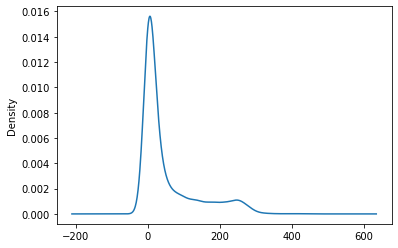

In [19]:
data_to_release['Fare_Time'].value_counts().plot.kde()

<AxesSubplot:>

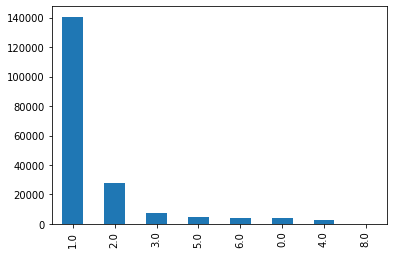

In [20]:
data_to_release['passenger_count'].value_counts().plot.bar()

<AxesSubplot:>

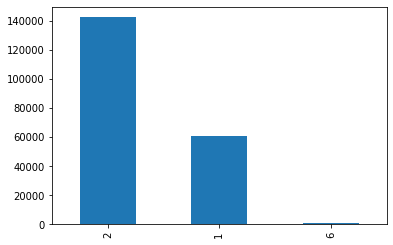

In [21]:
data_to_release['VendorID'].value_counts().plot.bar()

In [22]:
data_to_release['tpep_pickup_datetime'].dt.floor('1H')

0        2021-01-01 00:00:00
1        2021-01-01 00:00:00
2        2021-01-01 00:00:00
3        2021-01-01 00:00:00
4        2021-01-01 00:00:00
                 ...        
205719   2021-01-10 23:00:00
205720   2021-01-10 23:00:00
205721   2021-01-10 23:00:00
205722   2021-01-10 23:00:00
205723   2021-01-10 23:00:00
Name: tpep_pickup_datetime, Length: 204510, dtype: datetime64[ns]

<AxesSubplot:>

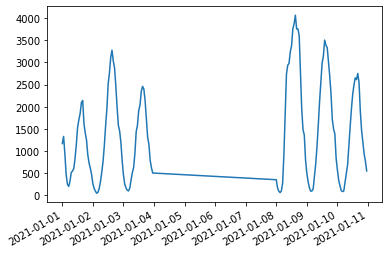

In [23]:
data_to_release['tpep_pickup_datetime'].dt.floor('1H').value_counts().sort_index().plot.line()

In [24]:
data_to_release[data_to_release['trip_distance'] > 3.9]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,id,paymnt_type,Fare_Time,Speed
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,False,132,165,1,...,8.65,0.00,0.3,51.95,0.0,NaN,2,1,1656.0,112.653061
3,1,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,False,138,132,1,...,6.05,0.00,0.3,36.35,0.0,NaN,3,1,913.0,86.132075
4,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,False,68,33,1,...,4.06,0.00,0.3,24.36,2.5,NaN,4,1,992.0,200.809717
6,1,2021-01-01 00:00:28,2021-01-01 00:17:28,1.0,4.10,1.0,False,95,157,2,...,0.00,0.00,0.3,17.30,0.0,NaN,6,2,1020.0,248.780488
7,1,2021-01-01 00:12:29,2021-01-01 00:30:34,1.0,5.70,1.0,False,90,40,2,...,0.00,0.00,0.3,21.80,2.5,NaN,7,2,1085.0,190.350877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205715,2,2021-01-10 23:32:00,2021-01-10 23:53:00,NaN,11.90,NaN,True,162,92,0,...,2.75,6.12,0.3,51.90,NaN,NaN,205715,0,1260.0,105.882353
205717,2,2021-01-10 23:00:00,2021-01-10 23:25:00,NaN,10.92,NaN,True,137,89,0,...,2.75,0.00,0.3,37.42,NaN,NaN,205717,0,1500.0,137.362637
205720,2,2021-01-10 23:14:00,2021-01-10 23:25:00,NaN,4.28,NaN,True,137,75,0,...,0.00,0.00,0.3,16.66,NaN,NaN,205720,0,660.0,154.205607
205721,2,2021-01-10 23:37:00,2021-01-10 23:58:00,NaN,12.54,NaN,True,74,130,0,...,2.75,6.12,0.3,54.60,NaN,NaN,205721,0,1260.0,100.478469


In [25]:
data_to_release[data_to_release['tpep_dropoff_datetime'].dt.day >10]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,id,paymnt_type,Fare_Time,Speed
136211,1,2021-01-09 00:46:44,2021-01-29 01:04:26,1.0,4.10,1.0,False,238,168,2,...,0.00,0.00,0.3,15.80,0.0,NaN,136211,2,1729062.0,421722.439024
175943,2,2021-01-10 00:53:25,2021-01-11 00:50:57,1.0,0.74,1.0,False,79,4,2,...,0.00,0.00,0.3,8.80,2.5,NaN,175943,2,86252.0,116556.756757
175986,2,2021-01-10 00:31:05,2021-01-11 00:26:59,1.0,3.47,1.0,False,249,141,2,...,0.00,0.00,0.3,16.30,2.5,NaN,175986,2,86154.0,24828.242075
176483,2,2021-01-10 01:09:08,2021-01-11 00:52:44,1.0,1.63,1.0,False,107,148,1,...,0.00,0.00,0.3,11.30,2.5,NaN,176483,1,85416.0,52402.453988
176673,2,2021-01-10 01:38:05,2021-01-11 01:30:01,2.0,0.97,1.0,False,79,107,2,...,0.00,0.00,0.3,8.80,2.5,NaN,176673,2,85916.0,88573.195876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205695,2,2021-01-10 23:51:00,2021-01-11 00:05:00,NaN,4.00,NaN,True,42,194,0,...,2.75,6.12,0.3,20.74,NaN,NaN,205695,0,840.0,210.000000
205700,2,2021-01-10 23:22:45,2021-01-11 00:01:49,NaN,16.24,NaN,True,181,42,0,...,2.75,0.00,0.3,54.64,NaN,NaN,205700,0,2344.0,144.334975
205711,2,2021-01-10 23:54:00,2021-01-11 00:08:00,NaN,3.04,NaN,True,141,238,0,...,2.73,0.00,0.3,20.04,NaN,NaN,205711,0,840.0,276.315789
205713,2,2021-01-10 23:33:00,2021-01-11 00:06:00,NaN,17.91,NaN,True,79,205,0,...,2.75,6.12,0.3,68.10,NaN,NaN,205713,0,1980.0,110.552764


<AxesSubplot:>

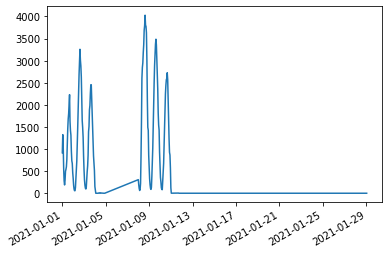

In [26]:
data_to_release['tpep_dropoff_datetime'].dt.floor('1H').value_counts().plot.line()

In [27]:
dtneeded = data_to_release[['fare_amount','extra','mta_tax','improvement_surcharge','tip_amount','tolls_amount','total_amount','congestion_surcharge', 'id', 'tpep_pickup_datetime']].melt(
    id_vars=["id","tpep_pickup_datetime"], 
    var_name="Type_Amount", 
    value_name="Value")
dtneeded

,id,tpep_pickup_datetime,Type_Amount,Value
0,0,2021-01-01 00:30:10,fare_amount,8.0
1,1,2021-01-01 00:51:20,fare_amount,3.0
2,2,2021-01-01 00:43:30,fare_amount,42.0
3,3,2021-01-01 00:15:48,fare_amount,29.0
4,4,2021-01-01 00:31:49,fare_amount,16.5
...,...,...,...,...
1636075,205719,2021-01-10 23:40:11,congestion_surcharge,NaN
1636076,205720,2021-01-10 23:14:00,congestion_surcharge,NaN
1636077,205721,2021-01-10 23:37:00,congestion_surcharge,NaN
1636078,205722,2021-01-10 23:05:16,congestion_surcharge,NaN


In [28]:
# dtneeded.to_csv('payment_breakdown.csv')

In [29]:
data_to_release[['fare_amount','total_amount']]

,fare_amount,total_amount
0,8.00,11.80
1,3.00,4.30
2,42.00,51.95
3,29.00,36.35
4,16.50,24.36
...,...,...
205719,11.70,15.00
205720,13.36,16.66
205721,44.93,54.60
205722,27.76,31.31


In [30]:
data_pivotted = pd.DataFrame({'id': data_to_release.index, 
'tpep_pickup_datetime':data_to_release.tpep_pickup_datetime})
data_pivotted

,id,tpep_pickup_datetime
0,0,2021-01-01 00:30:10
1,1,2021-01-01 00:51:20
2,2,2021-01-01 00:43:30
3,3,2021-01-01 00:15:48
4,4,2021-01-01 00:31:49
...,...,...
205719,205719,2021-01-10 23:40:11
205720,205720,2021-01-10 23:14:00
205721,205721,2021-01-10 23:37:00
205722,205722,2021-01-10 23:05:16


In [31]:
# data[data['tpep_pickup_datetime'].dt.day in [1,2,3,8,9,10]].to_csv('yellow_tripdata_2021-01.csv')

In [32]:
# data.to_csv('yellow_tripdata_2021-01.csv')